In [2]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import burst_detector as bd
import scipy.io
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(42)

In [3]:
# loading data
fs = 30000
times = np.load('../data/neuropixels_dohoung/KS2.5/phy_in/spike_times.npy').flatten()/fs
clusters = np.load('../data/neuropixels_dohoung/KS2.5/phy_in/spike_clusters.npy').flatten()

n_clusters = np.unique(clusters).size
n = times.shape[0]

In [127]:
# fix cluster numbering
clusters, fix_clust = bd.fix_clust_ids(clusters_old, n_clusters)

In [6]:
st0 = np.array(bd.find_times(times, clusters, 0), dtype='int32')
# st1 = np.array(bd.find_times(times, clusters, [1])[0])

np.savetxt('st0.txt', st0)
# np.savetxt('st1.txt', st1)

In [8]:
x0 = bd.fit_PoissonGP(st0, [1], [0, 190], .2)

Optimization terminated successfully.
         Current function value: 71.131200
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Hessian evaluations: 11


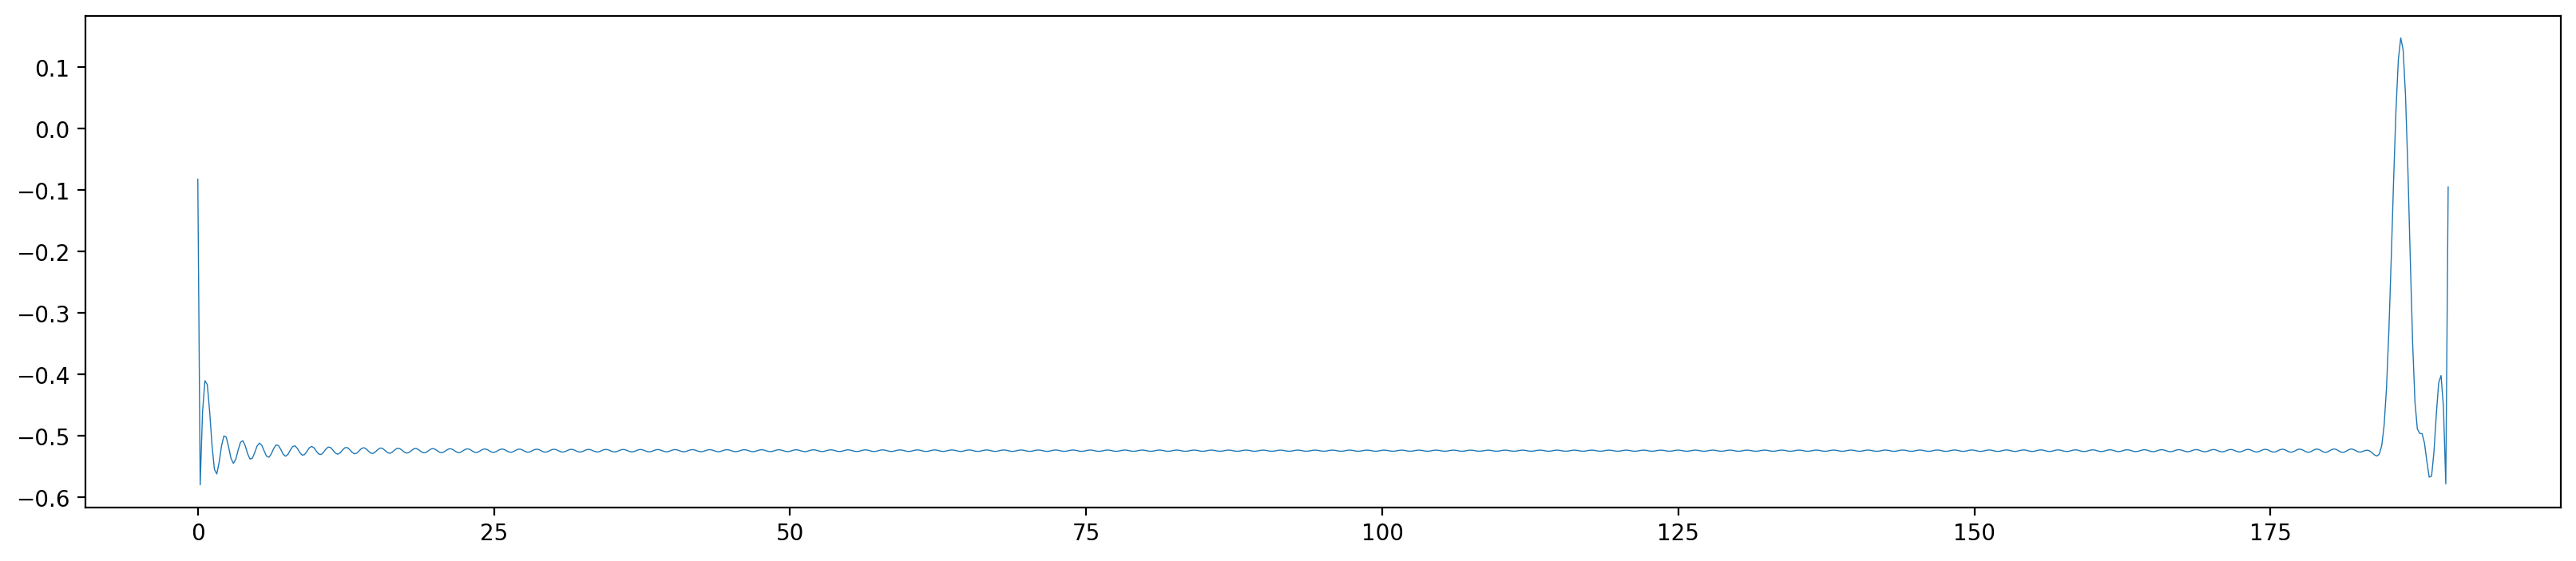

In [9]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 950),x0, linewidth=0.5)

In [132]:
import pandas as pd

In [133]:
bursts0 = pd.read_csv('./bursts_s0_cl0.csv')[["level","start","end"]].to_numpy()
bursts1 = pd.read_csv('./bursts_s0_cl1.csv')[["level","start","end"]].to_numpy()

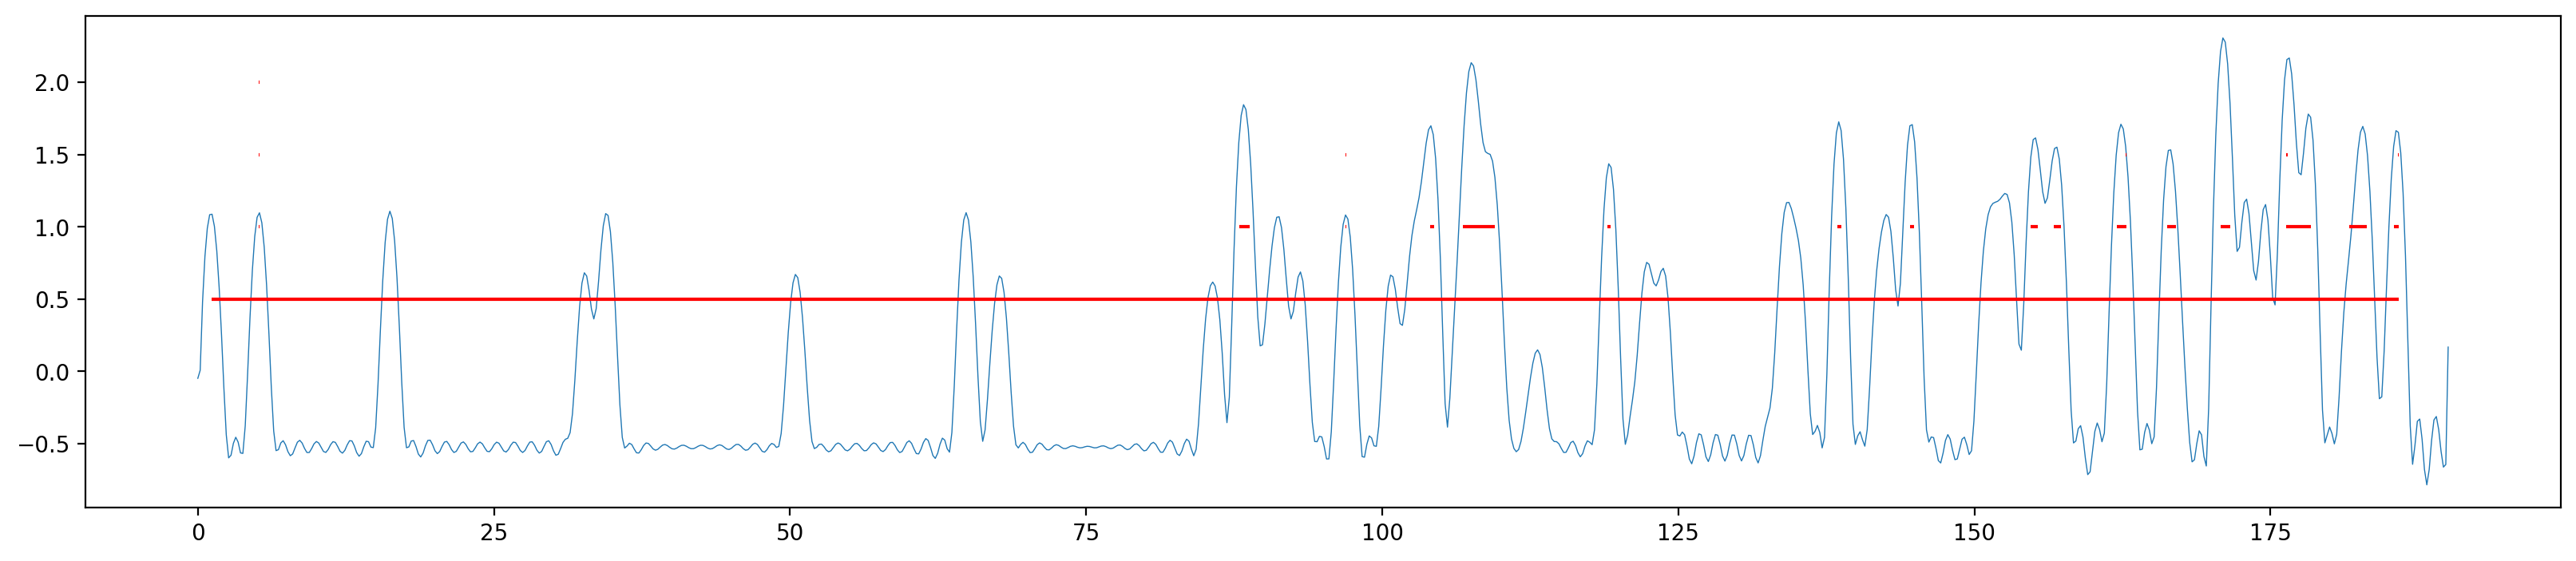

In [134]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 950),x0, linewidth=0.5)
plt.hlines(bursts0[:,0]/2, bursts0[:,1], bursts0[:,2], 'r');

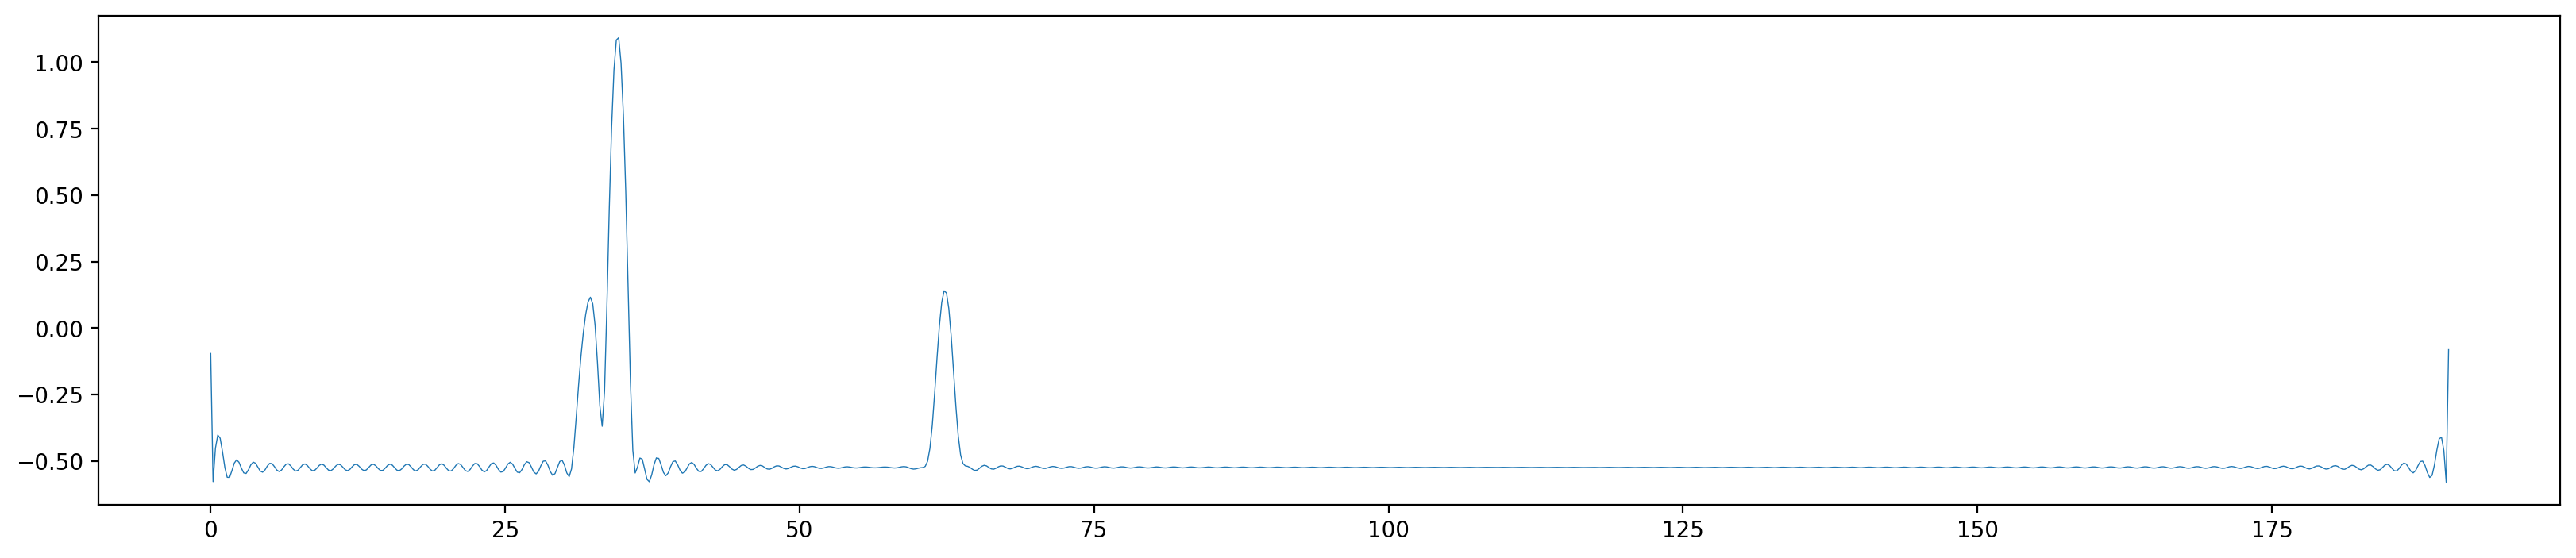

In [135]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 950),x1, linewidth=0.5)

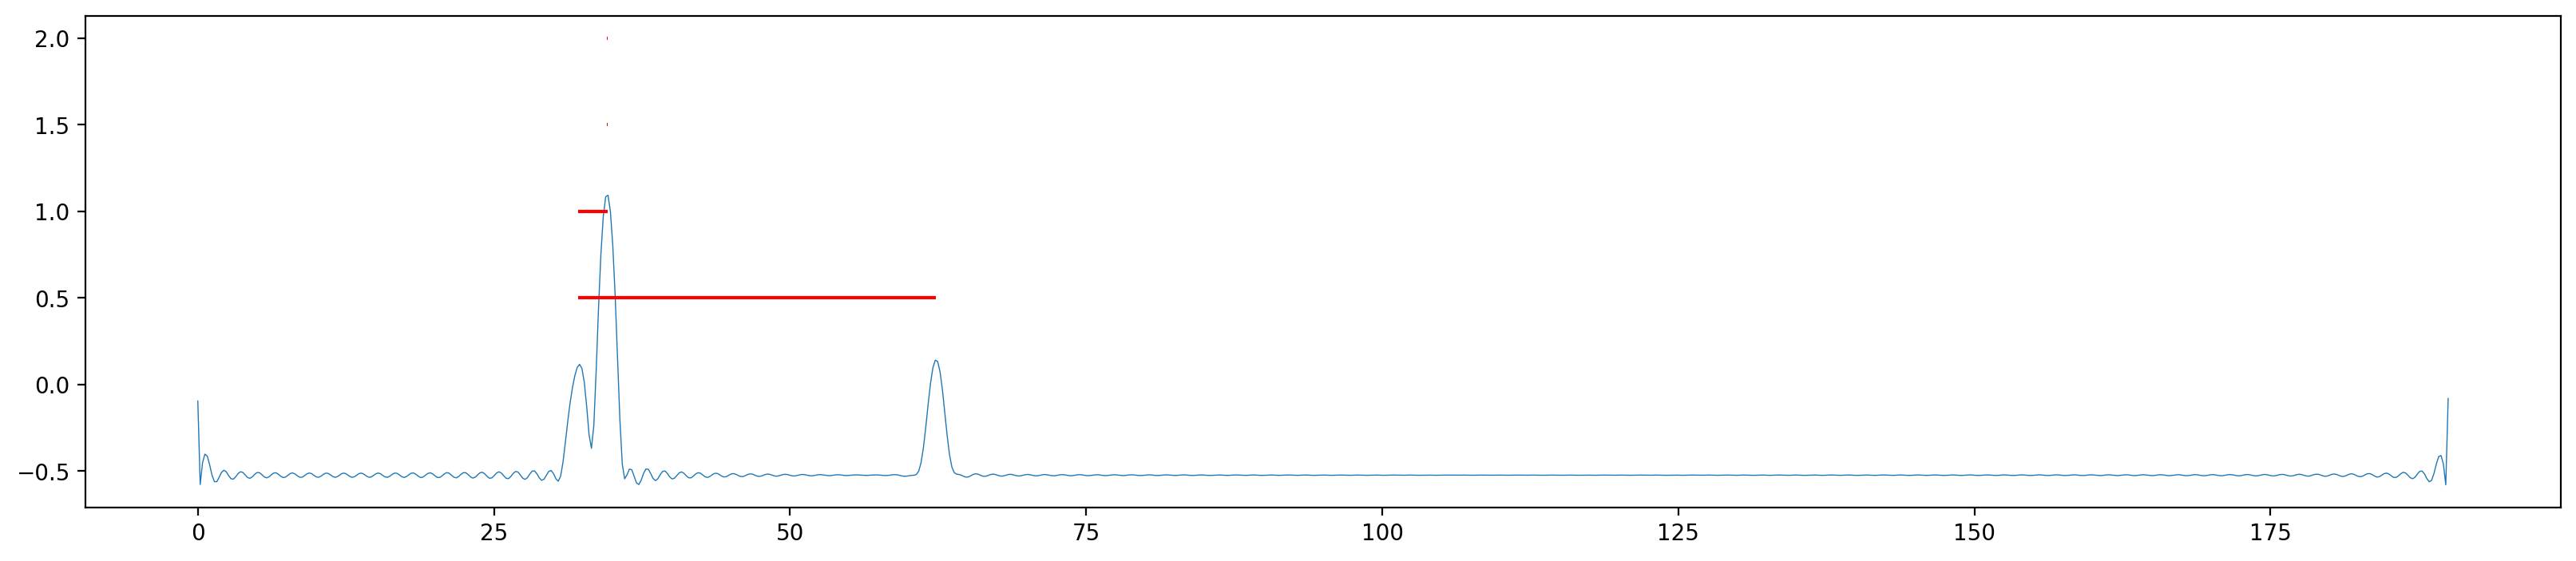

In [136]:
plt.figure(1, figsize=(20, 4))
plt.plot(np.linspace(0, 190, 950),x1, linewidth=0.5)
plt.hlines(bursts1[:,0]/2, bursts1[:,1], bursts1[:,2], 'r')

In [139]:
# sim 1 Hz spike train
st_sim1 = np.cumsum(np.random.exponential(1, 190))
np.savetxt('st_sim1.txt', st_sim1)

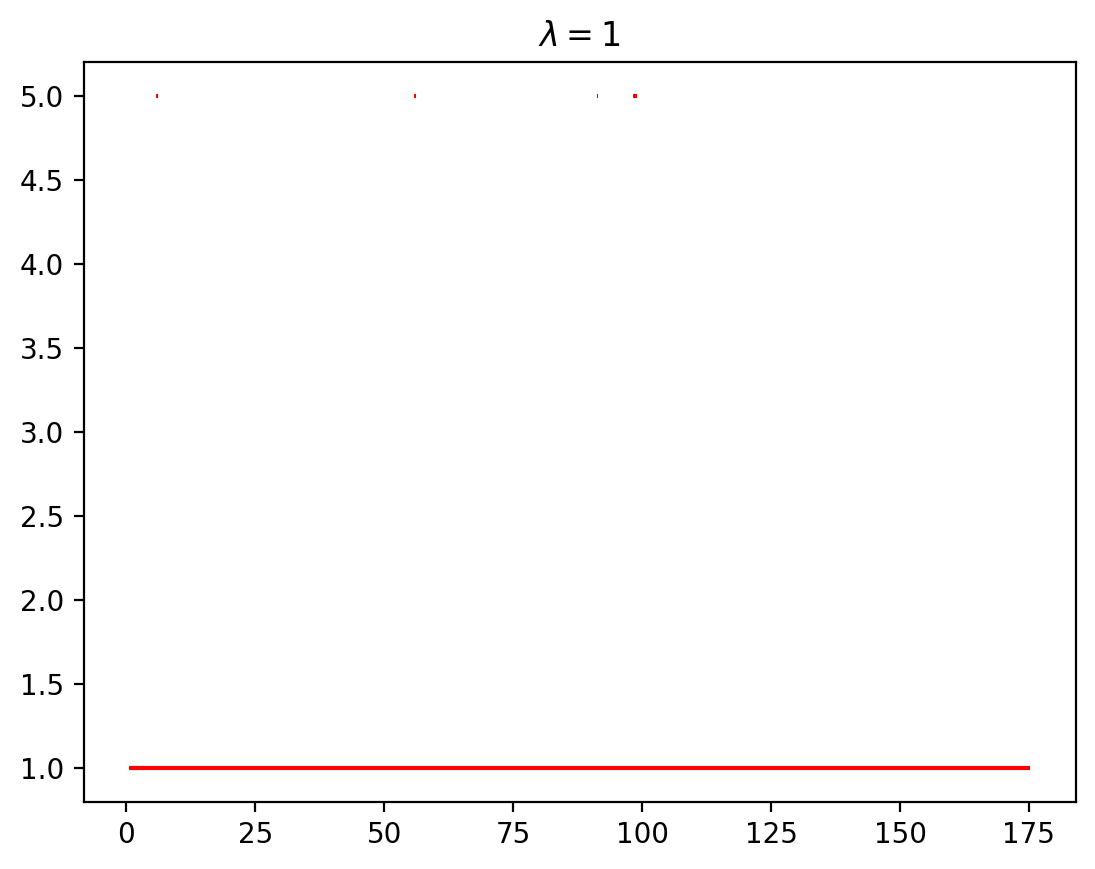

In [141]:
bursts_sim1 = pd.read_csv('./bursts_sim1.csv')[["level","start","end"]].to_numpy()
plt.hlines(5**(bursts_sim1[:,0]-1), bursts_sim1[:,1], bursts_sim1[:,2], 'r'); plt.title(r'$\lambda = 1$');

In [140]:
# sim 10 Hz spike train
st_sim2 = np.cumsum(np.random.exponential(1/10, 1900))
np.savetxt('st_sim2.txt', st_sim2)

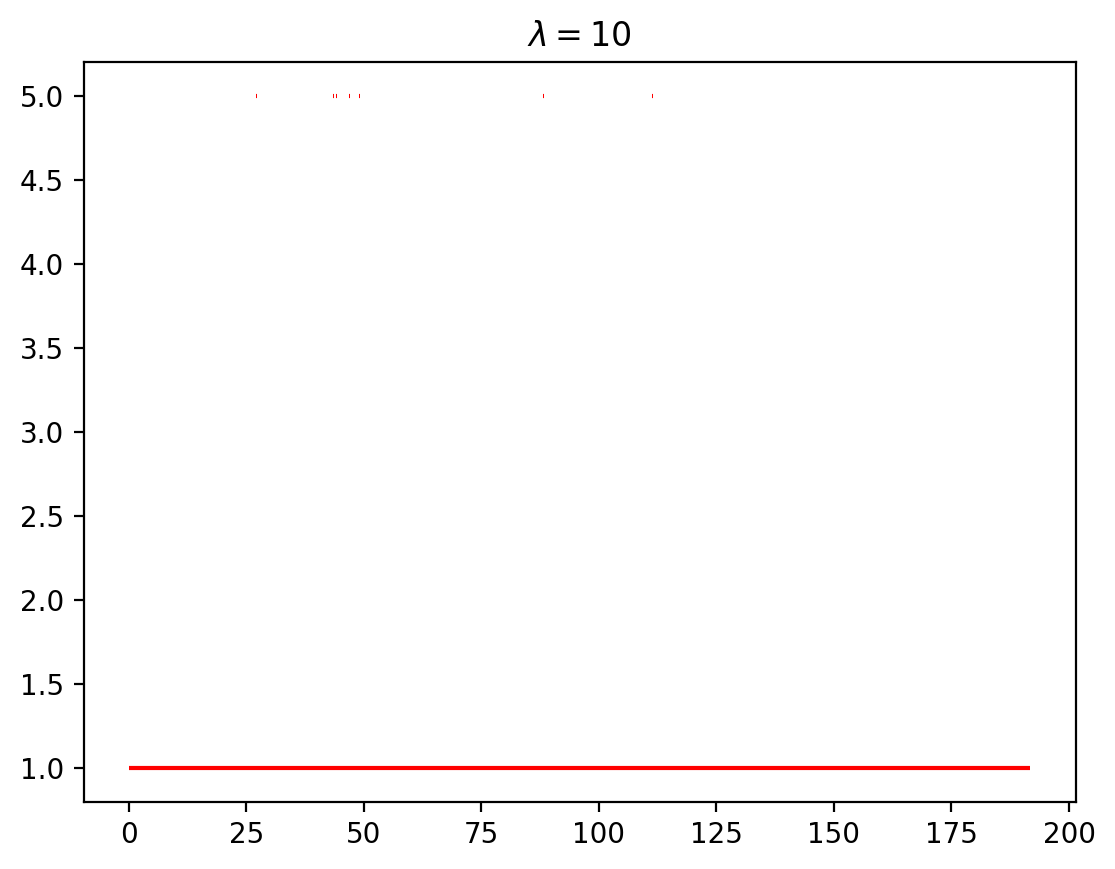

In [142]:
bursts_sim2 = pd.read_csv('./bursts_sim2.csv')[["level","start","end"]].to_numpy()
plt.hlines(5**(bursts_sim2[:,0]-1), bursts_sim2[:,1], bursts_sim2[:,2], 'r'); plt.title(r'$\lambda = 10$');

In [143]:
# sim 100 Hz spike train
st_sim3 = np.cumsum(np.random.exponential(1/100, 19000))
np.savetxt('st_sim3.txt', st_sim3)

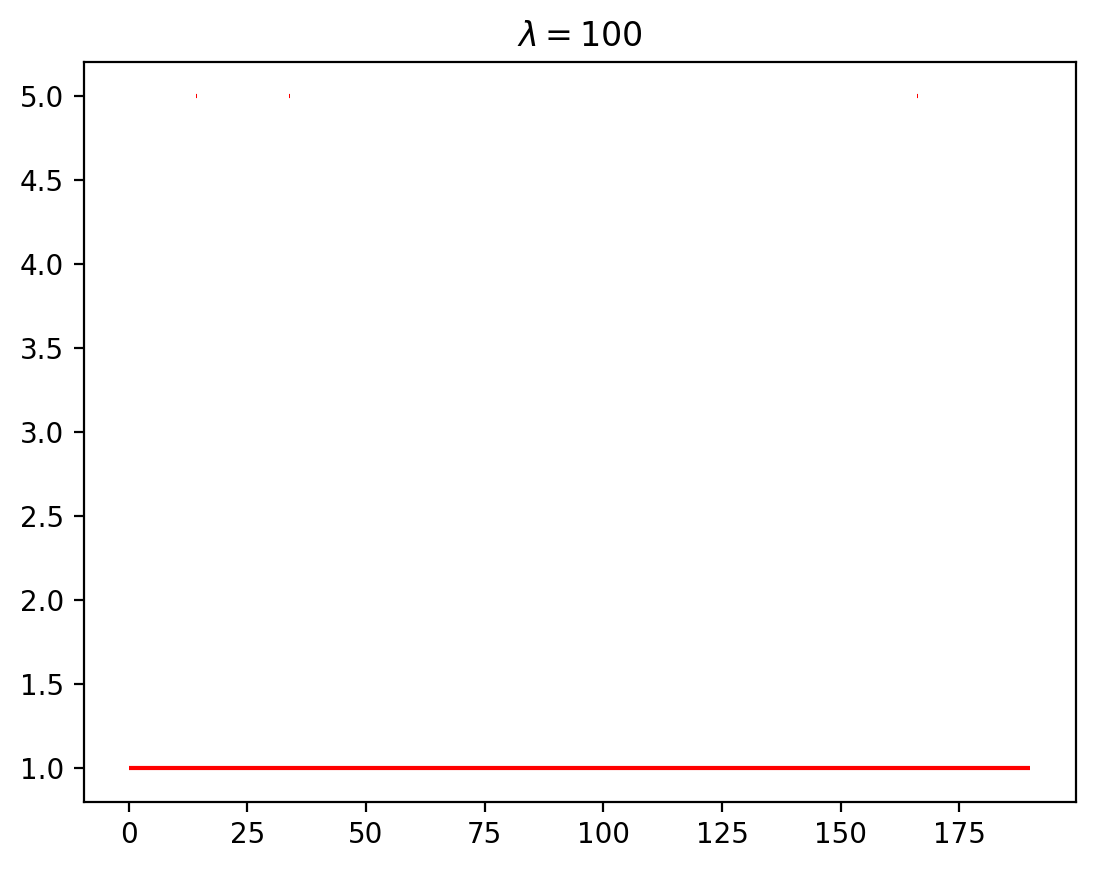

In [144]:
bursts_sim3 = pd.read_csv('./bursts_sim3.csv')[["level","start","end"]].to_numpy()
plt.hlines(5**(bursts_sim3[:,0]-1), bursts_sim3[:,1], bursts_sim3[:,2], 'r'); plt.title(r'$\lambda = 100$');